In [1]:
#Gaberial Campese
#DATS 6103 - Individual Project 2

#import libraries
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#read in web-hacking dataset, was having errors so changed encoding
webhacks_data = pd.read_csv('Web Attacks Data.csv', encoding = 'latin1')

In [3]:
webhacks_data.head()

,Date,Notify,URL,IP,Country,OS,WebServer,Encoding,Lang
0,1998-01-02,Team CodeZero,http://www.janet-jackson.com,NaN,UNKNOWN,Unknown,Unknown,utf-8,NaN
1,1998-01-03,Feliz,http://cariari.ucr.ac.cr,NaN,COSTA RICA,Unknown,Unknown,NaN,NaN
2,1998-01-04,Optiklenz(LOU),http://marin.k12.ca.us,NaN,UNITED STATES,Unknown,Unknown,iso-8859-1,Helvetica
3,1998-01-04,Team CodeZero,http://www.dm.af.mil,NaN,AFGHANISTAN,Unknown,Unknown,utf-8,NaN
4,1998-01-04,Team CodeZero,http://www.bolling.af.mil,NaN,AFGHANISTAN,Unknown,Unknown,windows-1252,Times New Roman


In [4]:
webhacks_data.shape #212,093 rows and 9 columns

(212093, 9)

In [5]:
webhacks_data.head()

,Date,Notify,URL,IP,Country,OS,WebServer,Encoding,Lang
0,1998-01-02,Team CodeZero,http://www.janet-jackson.com,NaN,UNKNOWN,Unknown,Unknown,utf-8,NaN
1,1998-01-03,Feliz,http://cariari.ucr.ac.cr,NaN,COSTA RICA,Unknown,Unknown,NaN,NaN
2,1998-01-04,Optiklenz(LOU),http://marin.k12.ca.us,NaN,UNITED STATES,Unknown,Unknown,iso-8859-1,Helvetica
3,1998-01-04,Team CodeZero,http://www.dm.af.mil,NaN,AFGHANISTAN,Unknown,Unknown,utf-8,NaN
4,1998-01-04,Team CodeZero,http://www.bolling.af.mil,NaN,AFGHANISTAN,Unknown,Unknown,windows-1252,Times New Roman


In [6]:
webhacks_droppedset = webhacks_data.drop(['IP','Encoding','Lang'],axis=1) #drop unused columns. axis = 1 for columns.

In [7]:
webhacks_droppedset.head()

,Date,Notify,URL,Country,OS,WebServer
0,1998-01-02,Team CodeZero,http://www.janet-jackson.com,UNKNOWN,Unknown,Unknown
1,1998-01-03,Feliz,http://cariari.ucr.ac.cr,COSTA RICA,Unknown,Unknown
2,1998-01-04,Optiklenz(LOU),http://marin.k12.ca.us,UNITED STATES,Unknown,Unknown
3,1998-01-04,Team CodeZero,http://www.dm.af.mil,AFGHANISTAN,Unknown,Unknown
4,1998-01-04,Team CodeZero,http://www.bolling.af.mil,AFGHANISTAN,Unknown,Unknown


In [8]:
webhacks_data_rename = webhacks_droppedset.rename(columns={'Notify':'Attacker', 'URL':'Target URL'}) #rename columns

In [9]:
webhacks_data_rename.head()

,Date,Attacker,Target URL,Country,OS,WebServer
0,1998-01-02,Team CodeZero,http://www.janet-jackson.com,UNKNOWN,Unknown,Unknown
1,1998-01-03,Feliz,http://cariari.ucr.ac.cr,COSTA RICA,Unknown,Unknown
2,1998-01-04,Optiklenz(LOU),http://marin.k12.ca.us,UNITED STATES,Unknown,Unknown
3,1998-01-04,Team CodeZero,http://www.dm.af.mil,AFGHANISTAN,Unknown,Unknown
4,1998-01-04,Team CodeZero,http://www.bolling.af.mil,AFGHANISTAN,Unknown,Unknown


In [10]:
#Now, let's get a timeline of the Web Attacks by Year and eventually graph them
#Need to clean Date data first
webhacks_yearly = webhacks_data_rename
webhacks_yearly['Year'] = webhacks_yearly['Date'].astype('datetime64[ns]').dt.year #new Year column created
webhacks_yearly.head()

,Date,Attacker,Target URL,Country,OS,WebServer,Year
0,1998-01-02,Team CodeZero,http://www.janet-jackson.com,UNKNOWN,Unknown,Unknown,1998
1,1998-01-03,Feliz,http://cariari.ucr.ac.cr,COSTA RICA,Unknown,Unknown,1998
2,1998-01-04,Optiklenz(LOU),http://marin.k12.ca.us,UNITED STATES,Unknown,Unknown,1998
3,1998-01-04,Team CodeZero,http://www.dm.af.mil,AFGHANISTAN,Unknown,Unknown,1998
4,1998-01-04,Team CodeZero,http://www.bolling.af.mil,AFGHANISTAN,Unknown,Unknown,1998


In [12]:
#Yearly Attacks
webhacks_yearlyGr = webhacks_yearly.groupby(['Year']).count().drop(['Target URL', 'Country', 'OS', 'WebServer','Attacker'],axis=1).rename(columns={'Date':'Number of Attacks'})
webhacks_yearlyGr
#2009 has highest number of attacks followed by 2013

,Number of Attacks
Year,
1998,57
1999,983
2000,4204
2001,20844
2002,28613
2003,13865
2005,1000
2006,1008
2007,1030


In [13]:
totalAttacks = webhacks_yearlyGr['Number of Attacks'].sum()
totalAttacks #check to make sure number of rows match and it does

212093

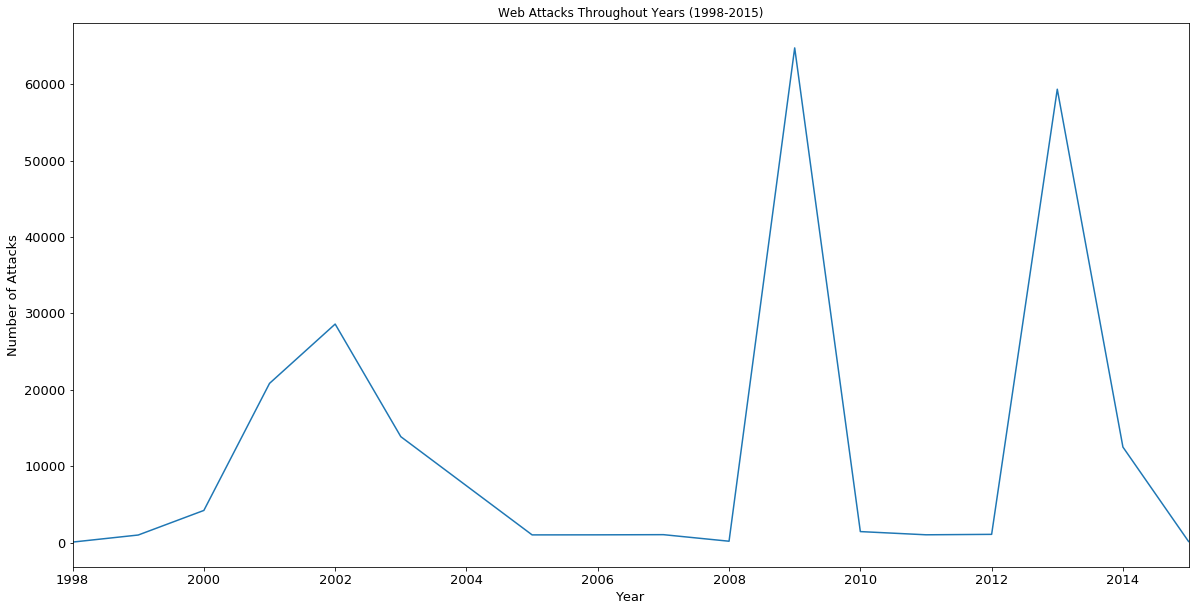

In [14]:
#Trend of Total Attacks w/ Line Graph
totalplt = webhacks_yearlyGr.plot(figsize=(20,10), fontsize=13, legend=False)
totalplt.set_title('Web Attacks Throughout Years (1998-2015)')
totalplt.set_xlabel('Year', fontsize=13)
totalplt.set_ylabel('Number of Attacks', fontsize=13)
plt.show()

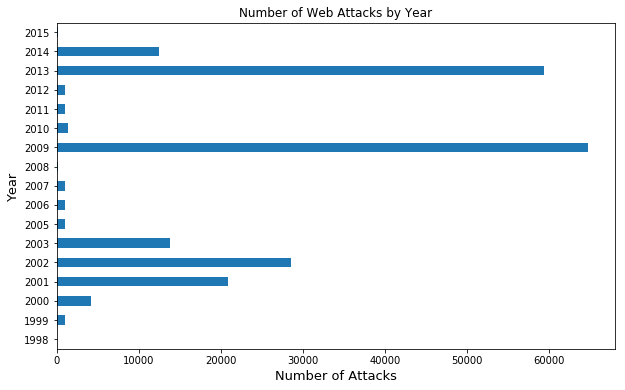

In [15]:
#Horizontal Bar Chart does better job at illustrating differences between Years
totalbary = webhacks_yearlyGr.plot(kind='barh', figsize=(10,6), title = 'Number of Web Attacks by Year', legend=False)
totalbary.set_xlabel('Number of Attacks', fontsize=13)
totalbary.set_ylabel('Year', fontsize=13)
plt.show()

In [16]:
#Attacks by Month
webhacks_monthly = webhacks_data_rename
webhacks_monthly['Month'] = webhacks_monthly['Date'].astype('datetime64[ns]').dt.month #new Month column created
webhacks_monthly.head()

,Date,Attacker,Target URL,Country,OS,WebServer,Year,Month
0,1998-01-02,Team CodeZero,http://www.janet-jackson.com,UNKNOWN,Unknown,Unknown,1998,1
1,1998-01-03,Feliz,http://cariari.ucr.ac.cr,COSTA RICA,Unknown,Unknown,1998,1
2,1998-01-04,Optiklenz(LOU),http://marin.k12.ca.us,UNITED STATES,Unknown,Unknown,1998,1
3,1998-01-04,Team CodeZero,http://www.dm.af.mil,AFGHANISTAN,Unknown,Unknown,1998,1
4,1998-01-04,Team CodeZero,http://www.bolling.af.mil,AFGHANISTAN,Unknown,Unknown,1998,1


In [17]:
#Monthly Attacks
webhacks_monthlyGr = webhacks_monthly.groupby(['Month']).count().drop(['Target URL', 'Country', 'OS', 'WebServer','Attacker','Year'],axis=1).rename(columns={'Date':'Number of Attacks'})
webhacks_monthlyGr
#October has significantly highest number of attacks followed by December

,Number of Attacks
Month,
1,6188
2,2686
3,4516
4,7710
5,19402
6,25640
7,3167
8,6464
9,2637


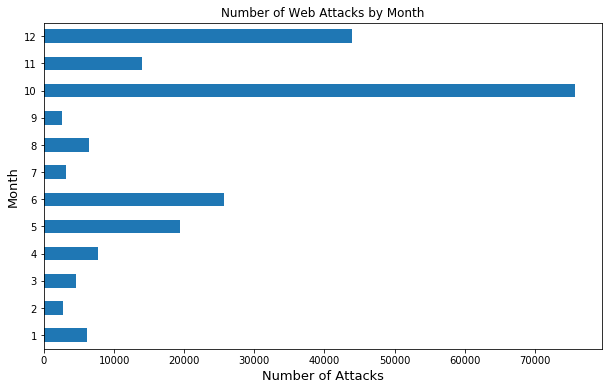

In [18]:
#Monthly Attack Visualization
totalbarm = webhacks_monthlyGr.plot(kind='barh', figsize=(10,6), title = 'Number of Web Attacks by Month', legend=False)
totalbarm.set_xlabel('Number of Attacks', fontsize=13)
totalbarm.set_ylabel('Month', fontsize=13)
plt.show()

In [19]:
#Now that a better idea of when the Web Attacks occurred is established including Unknowns...
#Let's find out where the top countries of occurrence were
topcountriesU = webhacks_monthly.groupby(['Country']).count().drop(['Target URL', 'OS', 'WebServer','Attacker','Year','Month'],axis=1).rename(columns={'Date':'Number of Attacks'})
topcountriesU = topcountriesU.sort_values(by='Number of Attacks', ascending=False).head(12) #Top 12 Countries of Occurrence including Unknowns
topcountriesU #notice United States has by far the highest number and also look at unknowns

,Number of Attacks
Country,
UNKNOWN,67293
UNITED STATES,59887
GERMANY,6933
BRAZIL,6625
SPAIN,6203
UNITED KINGDOM,5788
FRANCE,5106
CHINA,4078
CANADA,3040


In [20]:
#Alternatively, we could have created a data frame without Unknown countries as so
knowncountries = webhacks_monthly[webhacks_monthly.Country != 'UNKNOWN']
knowncountries.head()

,Date,Attacker,Target URL,Country,OS,WebServer,Year,Month
1,1998-01-03,Feliz,http://cariari.ucr.ac.cr,COSTA RICA,Unknown,Unknown,1998,1
2,1998-01-04,Optiklenz(LOU),http://marin.k12.ca.us,UNITED STATES,Unknown,Unknown,1998,1
3,1998-01-04,Team CodeZero,http://www.dm.af.mil,AFGHANISTAN,Unknown,Unknown,1998,1
4,1998-01-04,Team CodeZero,http://www.bolling.af.mil,AFGHANISTAN,Unknown,Unknown,1998,1
6,1998-01-05,Team CodeZero,http://www.nic.ad,ANDORRA,Unknown,Unknown,1998,1


In [21]:
knowncountries.shape #67,293 Unknowns were dropped accurately (212093-67293 = 144800)

(144800, 8)

In [22]:
#Known Countries Only
topcountriesK = knowncountries.groupby(['Country']).count().drop(['Target URL', 'OS', 'WebServer','Attacker','Year','Month'],axis=1).rename(columns={'Date':'Number of Attacks'})
topcountriesK = topcountriesK.sort_values(by='Number of Attacks', ascending=False).head(12) #Top 12 Known Countries of Occurrence
topcountriesK #notice United States has by far the highest number

,Number of Attacks
Country,
UNITED STATES,59887
GERMANY,6933
BRAZIL,6625
SPAIN,6203
UNITED KINGDOM,5788
FRANCE,5106
CHINA,4078
CANADA,3040
ITALY,3008


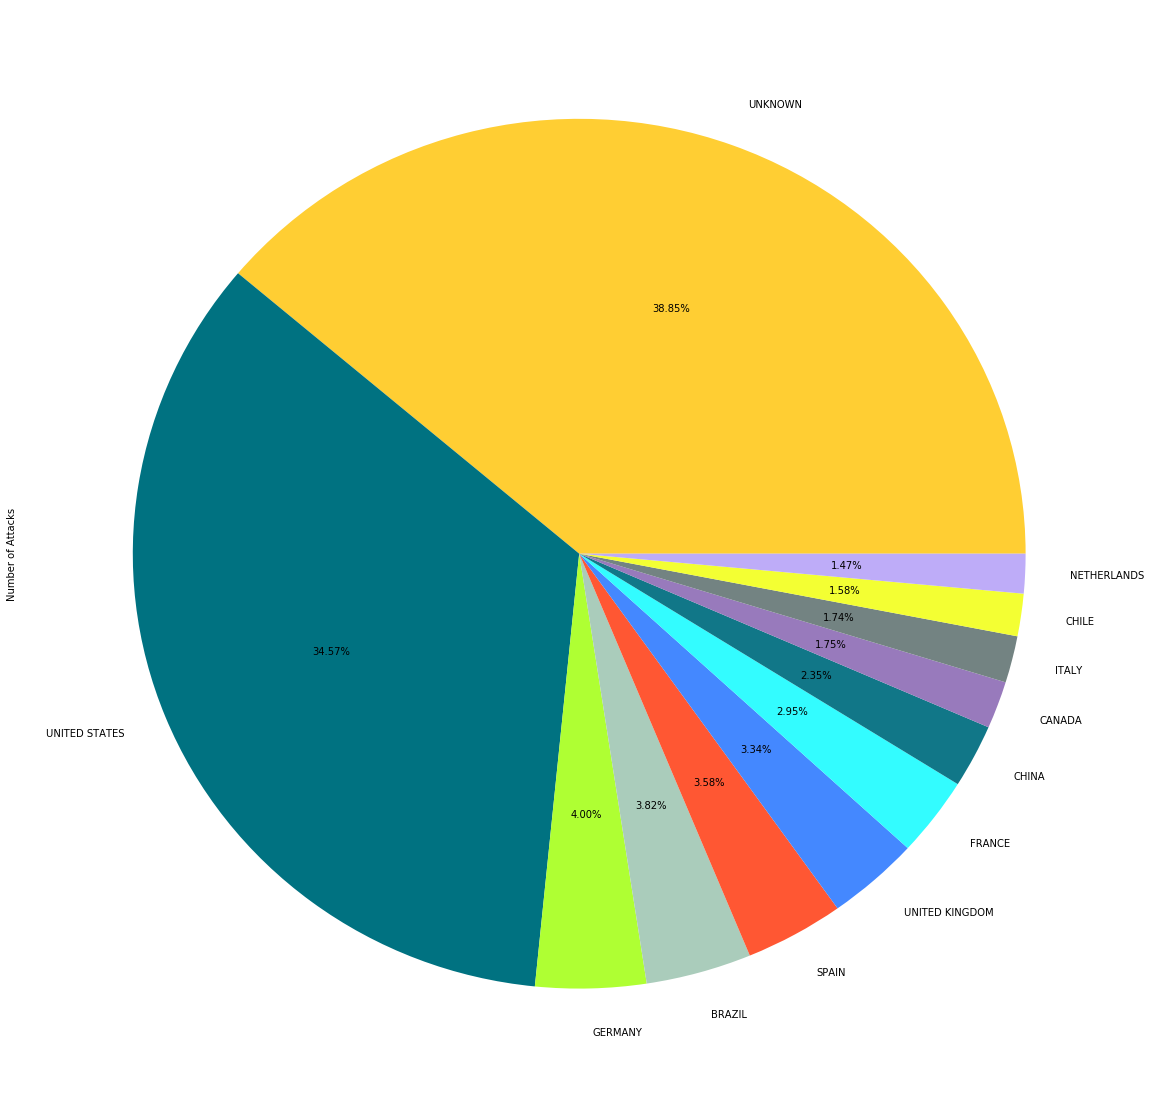

In [23]:
#Pie Chart by Country w/ Top 12 Countries including Unknowns
colors = ['#FFCE33', '#007281', '#AFFF33', '#AACCBB', '#FF5733','#4488FF', '#33FCFF', '#117788', '#987ABC', '#738382', '#F3FF33','#BEACF8']
topcountriesU.plot.pie(subplots=True, figsize=(20,20), legend=False, autopct='%0.2f%%', colors=colors, fontsize=10)
plt.show() 
#US accounts for 34.57% of Web Attacks for country of occurence even with unknowns (38.85%)

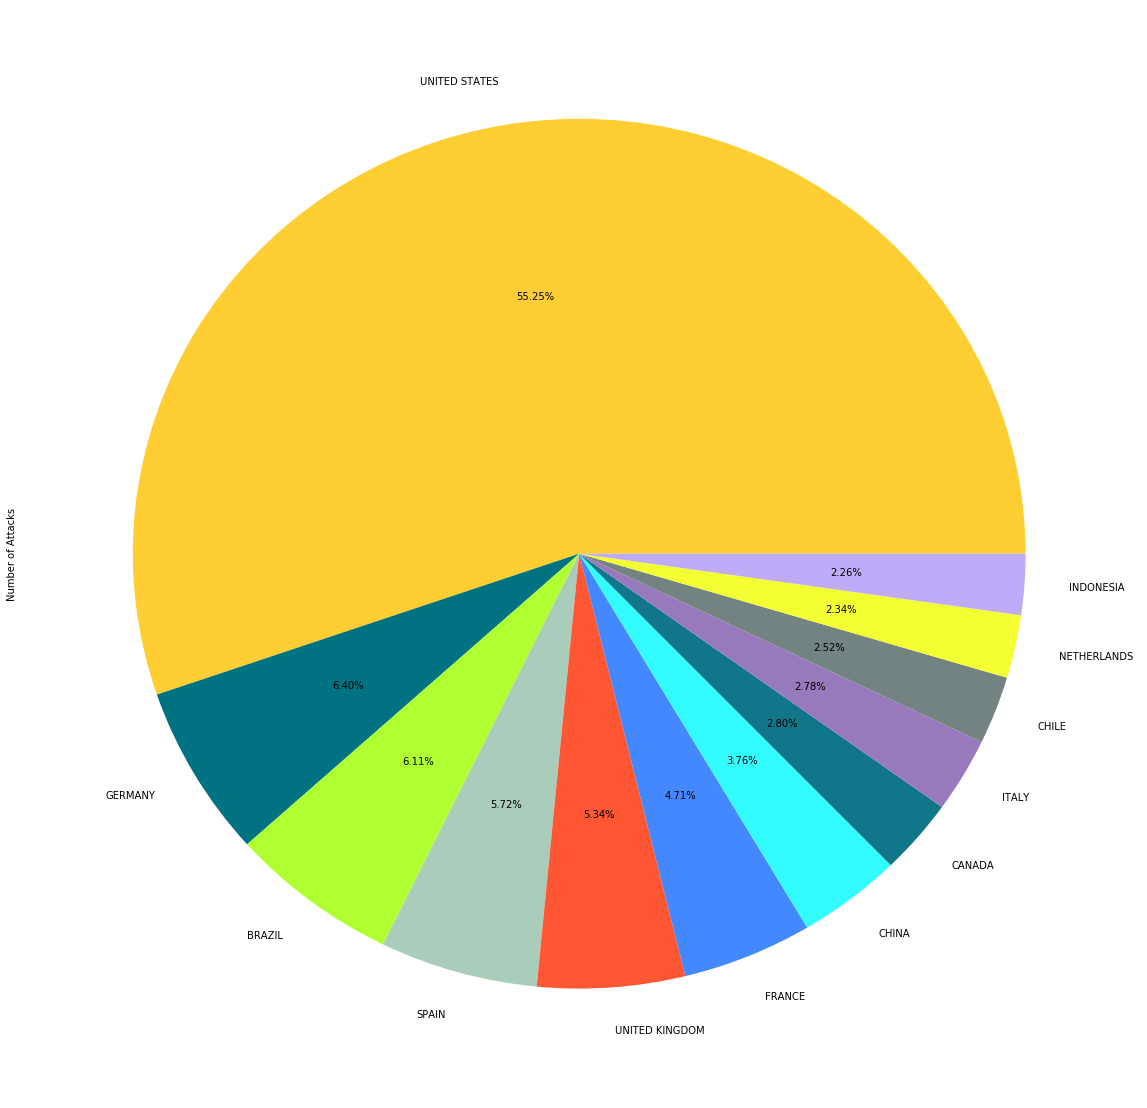

In [24]:
#Pie Chart by Top Known Countries Only
colors = ['#FFCE33', '#007281', '#AFFF33', '#AACCBB', '#FF5733','#4488FF', '#33FCFF', '#117788', '#987ABC', '#738382', '#F3FF33','#BEACF8']
topcountriesK.plot.pie(subplots=True, figsize=(20,20), legend=False, autopct='%0.2f%%', colors=colors, fontsize=10)
plt.show()
#US accounts for over half at 55.25% among top 12 countries
#Remember, these country charts visualize data for only the Top 12 Countries of Web Attack Occurrence (1998-2015)

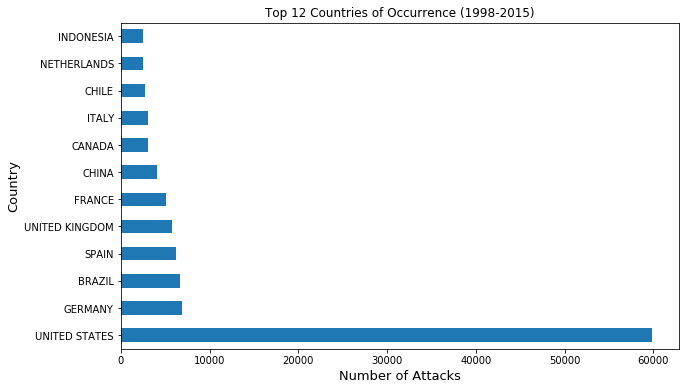

In [25]:
#Attack by Country Bar Chart excluding Unknowns
#Excluded Unknowns here because effects of unknowns illustrated in Pie Charts
country_bar = topcountriesK.plot(kind='barh', figsize=(10,6), title = 'Top 12 Countries of Occurrence (1998-2015)', legend=False)
country_bar.set_xlabel('Number of Attacks', fontsize=13)
country_bar.set_ylabel('Country', fontsize=13)
plt.show()
#Remember, this is country of occurence

In [26]:
#Top OS' Used Overall
OS_ranksF = webhacks_monthly.groupby(['OS']).count().drop(['Target URL', 'Attacker', 'WebServer','Year','Month','Country'],axis=1).rename(columns={'Date':'Number of Times Used'})
OS_ranksF = OS_ranksF.sort_values(by='Number of Times Used', ascending=False).head(10) #Top 10 OS used
OS_ranksF #Linux is found to be the most used OS among these Web Attacks by a large margin

,Number of Times Used
OS,
Linux,129712
Win 2003,20517
Windows,17119
Win 2000,14205
Unknown,9672
Win NT9x,4811
FreeBSD,3677
Win 2008,2676
SolarisSunOS,2644


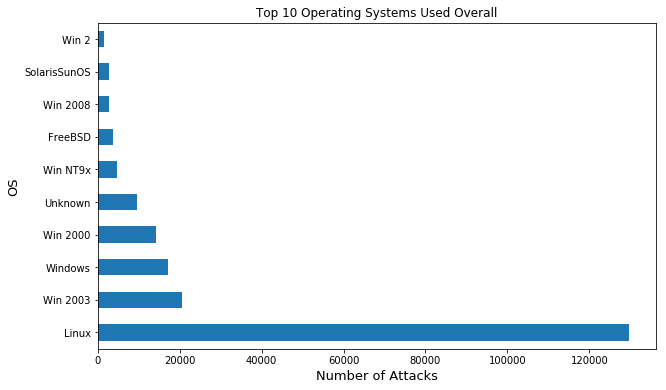

In [27]:
#Top 10 OS Utilization Bar Plot
overallOS_bar = OS_ranksF.plot(kind='barh', figsize=(10,6), title = 'Top 10 Operating Systems Used Overall', legend=False)
overallOS_bar.set_xlabel('Number of Attacks', fontsize=13)
overallOS_bar.set_ylabel('OS', fontsize=13)
plt.show()

In [28]:
#Top Web Servers Used Overall
WebServer_ranksF = webhacks_monthly.groupby(['WebServer']).count().drop(['Target URL', 'Attacker', 'OS','Year','Month','Country'],axis=1).rename(columns={'Date':'Number of Times Used'})
WebServer_ranksF = WebServer_ranksF.sort_values(by='Number of Times Used', ascending=False).head(10) #Top 10 Web Servers used
WebServer_ranksF #Apache is by far the most used Web Server in these attacks. Pay attention to unknowns and IIS, still not even close

,Number of Times Used
WebServer,
Apache,114310
Unknown,58837
IIS/6.0,20851
nginx,5400
IIS 5.0,3232
LiteSpeed,3101
IIS/5.0,2015
IIS/7.0,1445
IIS/7.5,1158


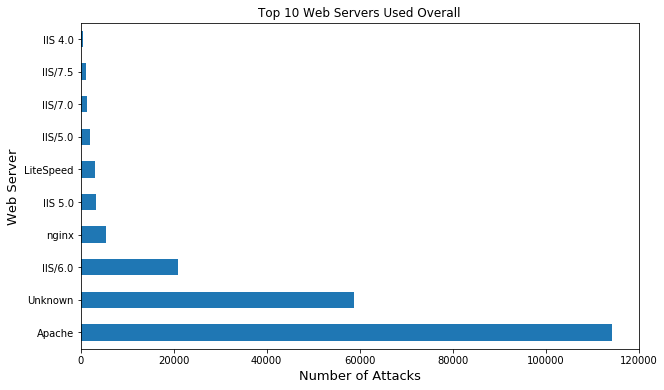

In [29]:
#Top 10 Web Server Utilization Plot
overallWeb_bar = WebServer_ranksF.plot(kind='barh', figsize=(10,6), title = 'Top 10 Web Servers Used Overall', legend=False)
overallWeb_bar.set_xlabel('Number of Attacks', fontsize=13)
overallWeb_bar.set_ylabel('Web Server', fontsize=13)
plt.show()

In [30]:
#Since a better picture of where, when, and how these Web Attacks occurred has been made, analysis of the Attackers will now commence
#Finding patterns and correlations with the groups, where, and what they used in the attacks will be attempted
#Specifically looking at Web Server and OS used in attack along with country of occurrence
#Starting with Top Attacking Groups

In [31]:
webhacks_monthly.head()

,Date,Attacker,Target URL,Country,OS,WebServer,Year,Month
0,1998-01-02,Team CodeZero,http://www.janet-jackson.com,UNKNOWN,Unknown,Unknown,1998,1
1,1998-01-03,Feliz,http://cariari.ucr.ac.cr,COSTA RICA,Unknown,Unknown,1998,1
2,1998-01-04,Optiklenz(LOU),http://marin.k12.ca.us,UNITED STATES,Unknown,Unknown,1998,1
3,1998-01-04,Team CodeZero,http://www.dm.af.mil,AFGHANISTAN,Unknown,Unknown,1998,1
4,1998-01-04,Team CodeZero,http://www.bolling.af.mil,AFGHANISTAN,Unknown,Unknown,1998,1


In [32]:
#Set index by Attacker
webhacks_final = webhacks_data_rename.set_index(['Attacker'])
webhacks_final.head()

,Date,Target URL,Country,OS,WebServer,Year,Month
Attacker,,,,,,,
Team CodeZero,1998-01-02,http://www.janet-jackson.com,UNKNOWN,Unknown,Unknown,1998,1
Feliz,1998-01-03,http://cariari.ucr.ac.cr,COSTA RICA,Unknown,Unknown,1998,1
Optiklenz(LOU),1998-01-04,http://marin.k12.ca.us,UNITED STATES,Unknown,Unknown,1998,1
Team CodeZero,1998-01-04,http://www.dm.af.mil,AFGHANISTAN,Unknown,Unknown,1998,1
Team CodeZero,1998-01-04,http://www.bolling.af.mil,AFGHANISTAN,Unknown,Unknown,1998,1


In [33]:
#Top 5 Attackers by number of Attacks
group_ranksF = webhacks_monthly.groupby(['Attacker']).count().drop(['Target URL', 'OS', 'WebServer','Year','Month','Country'],axis=1).rename(columns={'Date':'Number of Attacks'})
group_ranksF = group_ranksF.sort_values(by='Number of Attacks', ascending=False).head(5) #Top 5 Hackers
group_ranksF
#w4l3XzY3 is biggest perpetrator by a substantial margin based on number of attacks 
#iskorpitx and BD GREY HAT HACKERS follows

,Number of Attacks
Attacker,
w4l3XzY3,8928
iskorpitx,4577
BD GREY HAT HACKERS,3849
delirium,3238
Red Eye,2891


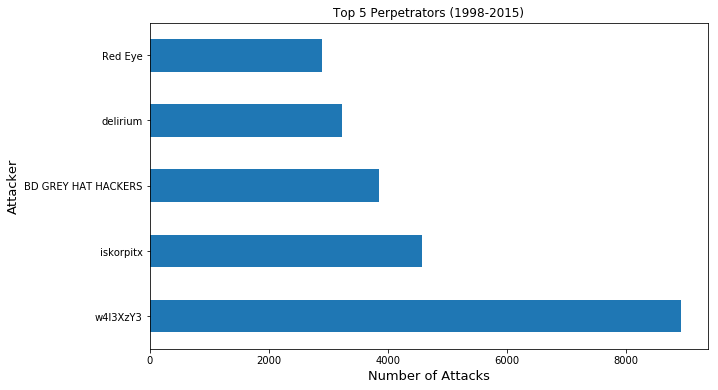

In [34]:
#Top 5 Groups Bar Chart
topgroups_bar = group_ranksF.plot(kind='barh', figsize=(10,6), title = 'Top 5 Perpetrators (1998-2015)', legend=False)
topgroups_bar.set_xlabel('Number of Attacks', fontsize=13)
topgroups_bar.set_ylabel('Attacker', fontsize=13)
plt.show()

In [35]:
#Create a data frame with newly discovered top 5 attackers
topgroupsdf = webhacks_final.loc[['w4l3XzY3','iskorpitx','BD GREY HAT HACKERS','delirium','Red Eye']]
topgroupsdf

,Date,Target URL,Country,OS,WebServer,Year,Month
Attacker,,,,,,,
w4l3XzY3,2012-06-20,http://horaciofumeiros.com/x.htm,GERMANY,Linux,Apache,2012,6
w4l3XzY3,2013-08-26,http://www.hageneder-lackiererei.de/components...,GERMANY,F5 Big-IP,Apache,2013,8
w4l3XzY3,2013-10-06,http://esteementerprise.com/templates/beez/ind...,UNITED STATES,Unknown,Apache,2013,10
w4l3XzY3,2013-10-06,http://belcron.com,UNITED STATES,Linux,Apache,2013,10
w4l3XzY3,2013-10-06,http://schoolsinoman.com/templates/beez/index.php,UNITED STATES,Linux,Apache,2013,10
w4l3XzY3,2013-10-06,http://www.axelgomez.com/templates/beez/index.php,UNITED STATES,FreeBSD,Apache,2013,10
w4l3XzY3,2013-10-06,http://albanicordero.com/w.htm,UNITED STATES,Linux,Apache,2013,10
w4l3XzY3,2013-10-06,http://alquilatuinmueble.com/w.htm,ARGENTINA,Linux,Apache,2013,10
w4l3XzY3,2013-10-06,http://atlas.facilwebatlas.com/w.htm,UNITED STATES,Linux,Apache,2013,10


In [36]:
topgroupsdf.shape #23,483 rows, 7 columns

(23483, 7)

In [37]:
#Most used OS among top 5 Groups
OS_tops = topgroupsdf.groupby(['OS']).count().drop(['Target URL', 'WebServer','Year','Month','Country'],axis=1).rename(columns={'Date':'Number of Times Used'})
OS_tops = OS_tops.sort_values(by='Number of Times Used', ascending=False) #OS' used in desc order 
OS_tops #Linux is most used OS among top 5

,Number of Times Used
OS,
Linux,18673
Unknown,2665
Win NT9x,637
Win 2000,497
Win 2008,382
Win 2003,302
FreeBSD,109
Win 2,60
Citrix embedded,26


In [38]:
OS_tops['Number of Times Used'].sum() #sum is 23483, just like shape. Good to check

23483

In [39]:
OS_tops.head(6) #Top 5 OS' with Unknowns among top groups

,Number of Times Used
OS,
Linux,18673
Unknown,2665
Win NT9x,637
Win 2000,497
Win 2008,382
Win 2003,302


In [40]:
OS_tops.head(6).sum() #23156 --> top 5 OSs with unknown account for just about all OS used among top 5 groups

Number of Times Used    23156
dtype: int64

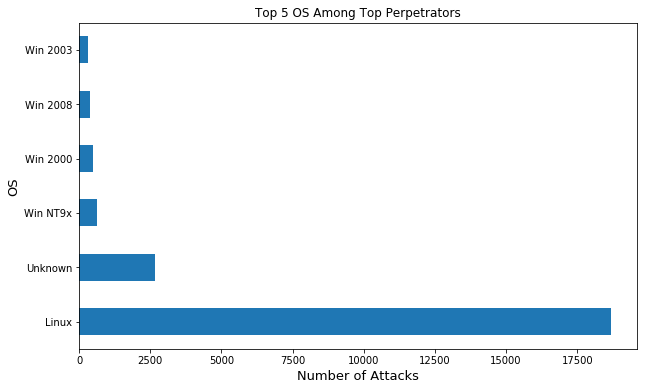

In [41]:
#Top 5 OS' among Top Perpetrators Bar Chart
OStops_bar = OS_tops.head(6).plot(kind='barh', figsize=(10,6), title = 'Top 5 OS Among Top Perpetrators', legend=False)
OStops_bar.set_xlabel('Number of Attacks', fontsize=13)
OStops_bar.set_ylabel('OS', fontsize=13)
plt.show()

In [42]:
#Most used Web Servers among top 5 Groups
WebServer_tops = topgroupsdf.groupby(['WebServer']).count().drop(['Target URL', 'OS','Year','Month','Country'],axis=1).rename(columns={'Date':'Number of Times Used'})
WebServer_tops = WebServer_tops.sort_values(by='Number of Times Used', ascending=False) #Web Servers used in desc order 
WebServer_tops #We see that Apache is most used Web Server among the Top 5

,Number of Times Used
WebServer,
Apache,18858
Unknown,3375
IIS/7.0,332
IIS/6.0,310
nginx,241
IIS/5.0,130
LiteSpeed,67
IIS/7.5,63
Oversee Turing v1.0.0,26


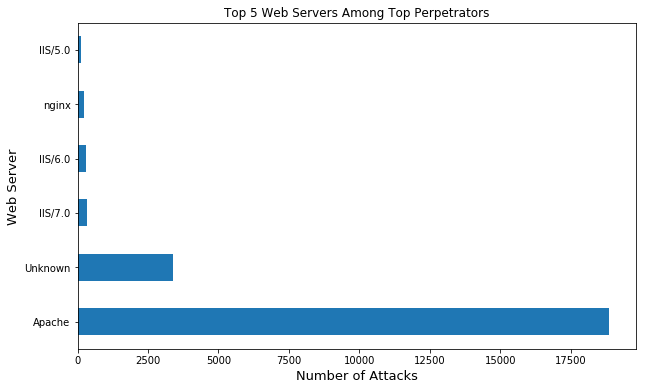

In [43]:
#Top 5 Web Servers among Top Perpetrators Bar Chart
Webtops_bar = WebServer_tops.head(6).plot(kind='barh', figsize=(10,6), title = 'Top 5 Web Servers Among Top Perpetrators', legend=False)
Webtops_bar.set_xlabel('Number of Attacks', fontsize=13)
Webtops_bar.set_ylabel('Web Server', fontsize=13)
plt.show()

In [44]:
#Most targeted Countries among top 5 Groups
Country_tops = topgroupsdf.groupby(['Country']).count().drop(['Target URL', 'OS','Year','Month','WebServer'],axis=1).rename(columns={'Date':'Number of Attacks'})
Country_tops = Country_tops.sort_values(by='Number of Attacks', ascending=False).head(12) #Top 12 Countries Targeted in desc order 
Country_tops #USA is country most targeted by top 5 groups

,Number of Attacks
Country,
UNITED STATES,6697
UNKNOWN,5189
SPAIN,4739
FRANCE,2390
BRAZIL,915
NETHERLANDS,470
SLOVENIA,457
CANADA,439
UNITED KINGDOM,385


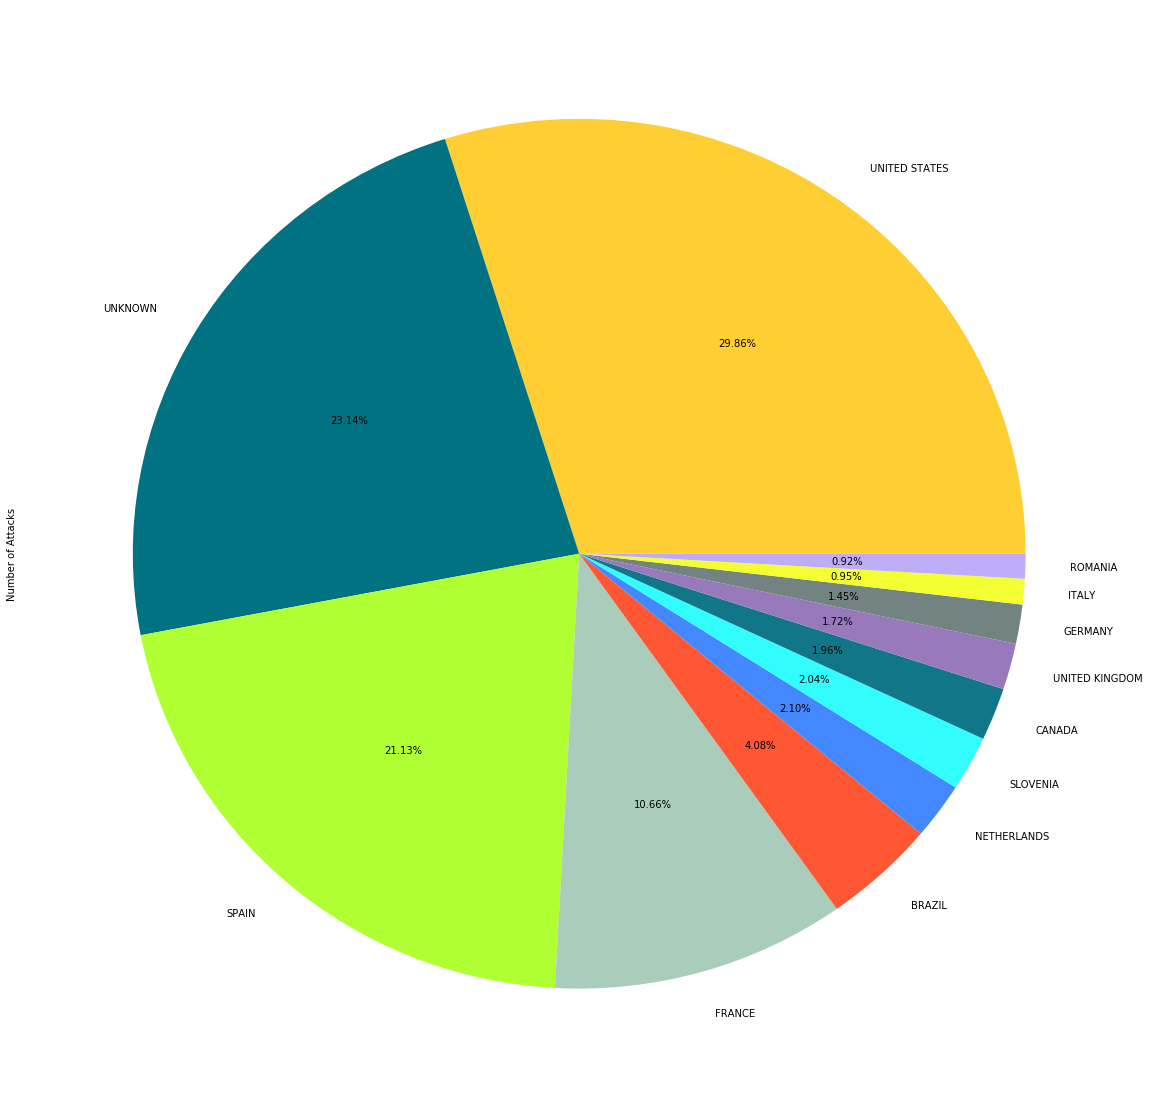

In [45]:
#Pie Chart by Country w/ Top 12 Countries including Unknowns Among Top Groups
colors = ['#FFCE33', '#007281', '#AFFF33', '#AACCBB', '#FF5733','#4488FF', '#33FCFF', '#117788', '#987ABC', '#738382', '#F3FF33','#BEACF8']
Country_tops.plot.pie(subplots=True, figsize=(20,20), legend=False, autopct='%0.2f%%', colors=colors, fontsize=10)
plt.show() 
#US accounts for 29.86% of Web Attacks for country of occurence even with unknowns at 23.14%. Spain follows fairly close at 21.13%

In [46]:
#Function that returns Amount of Times OS is used in a certain group's attacks
def OS_Times_Used(Attacker):    
    topgroupsdf_indexed = webhacks_data_rename.set_index(['Attacker','Country','OS','WebServer']).groupby(['Attacker', 'OS']).count().drop(['Target URL', 'Year','Month'],axis=1).rename(columns={'Date':'Number of Attacks'})
    topgroupsdf_indexed = topgroupsdf_indexed.sort_values(by='Number of Attacks', ascending=False)
    return topgroupsdf_indexed.loc[Attacker]

In [58]:
OS_Times_Used('anonymous').head(5) #Simply pass any group (not limited to top 5) in as parameter to get breakdown of OS' used in attacks

,Number of Attacks
OS,
Linux,5


In [48]:
#Function that returns amount of times a WebServer is used by an Attacker
def WebServer_Times_Used(Attacker):    
    topgroupsdf_indexed = webhacks_data_rename.set_index(['Attacker','Country','OS','WebServer']).groupby(['Attacker', 'WebServer']).count().drop(['Target URL', 'Year','Month'],axis=1).rename(columns={'Date':'Number of Attacks'})
    topgroupsdf_indexed = topgroupsdf_indexed.sort_values(by='Number of Attacks', ascending=False)
    return topgroupsdf_indexed.loc[Attacker]

In [59]:
WebServer_Times_Used('BD GREY HAT HACKERS').head(5) #Pass any Attacker as parameter to return WebServer usage

,Number of Attacks
WebServer,
Apache,3506
nginx,163
IIS/7.5,61
LiteSpeed,55
Oversee Turing v1.0.0,23


In [50]:
def TargetedCountries(Attacker):    
    topgroupsdf_indexed = webhacks_data_rename.set_index(['Attacker','Country','OS','WebServer']).groupby(['Attacker', 'Country']).count().drop(['Target URL', 'Year','Month'],axis=1).rename(columns={'Date':'Number of Attacks'})
    topgroupsdf_indexed = topgroupsdf_indexed.sort_values(by='Number of Attacks', ascending=False)
    return topgroupsdf_indexed.loc[Attacker]

In [60]:
TargetedCountries('BD GREY HAT HACKERS').head(5) #Pass any Attacker as a parameter to return their targeted countries

,Number of Attacks
Country,
UNITED STATES,3419
CANADA,76
UNITED KINGDOM,70
RUSSIAN FEDERATION,42
GERMANY,34
